# TD 2 | Analyse et visualisation de données avec numpy, pandas et matplotlib


Objectifs du TD :

* découvrir la visualisation de données avec matplotlib
* approfondir la maîtrise de numpy et pandas
* effectuer une première analyse exploratoire de données (EDA)
* découvrir la librairie de machine learning (ML) scikit-learn
* appliquer des techniques basiques d'apprentissage non supervisé pour visualiser et classifier des données (PCA, $k$-means)

---

## 1. Exploratory Data Analysis (EDA) avec matplotlib

<td><img src="./rc/matplotlib.png" /></td>

La librairie la plus couramment utilisée pour visualiser des données en Python est matplotlib (https://matplotlib.org/). D'autres librairies très utilisées et permettant certaines fonctionnalités plus avancées sont plotly (https://plot.ly/python/), bokeh (https://bokeh.pydata.org/en/latest/) ou encore seaborn (https://seaborn.pydata.org/). Nous allons dans un premier temps découvrir la première, matplotlib.

Le contexte permettant de tracer des graphes est `matplotlib.pyplot`, que l'on abrège souvent par `plt`, comme ci-dessous :

In [1]:
import matplotlib.pyplot as plt

**La documentation de pyplot : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot**

Découvrons les différents types de graphes en pratique, à l'aide du fichier `Vol010.csv`.

### Chargement des données de vol

In [ ]:
!git clone https://github.com/MadaneA/MACS3-Statistiques-Descriptives-TDs.git

In [ ]:
import os
os.getcwd()

In [ ]:
import os
os.chdir('MACS3-Statistiques-Descriptives-TDs')

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Ne pas modifier
vol = pd.read_csv("../data/Vol010.csv").drop(0).dropna(how='any').iloc[::10] # On ne garde qu'un point sur 10 pour limiter les points à afficher par vol
vol

,t,EGT_SEL,FLIGHT_MOD,FMV_SEL,HPTC_SEL,LPTC_SEL,N1_SEL,N2_ACTSEL,OIL_P,OIL_TEMP,...,T25_SEL,T3_SEL,VBV_SEL,VIB_CN1,VIB_CN2,VIB_TN1,VIB_TN2,VSV_SEL,WFM_SEL,XM
20,15/09/2011 14:26:02.875,335.984,1,0,0,0,0,0,0,177.374,...,-128,0,0,0,0,0,0,0,7679.84,0.15
30,15/09/2011 14:26:05.375,72.0006,1,0,0,0,0,0,0,68,...,-128,0,0,0,0,0,0,0,0,0.15
40,15/09/2011 14:26:07.875,72.0011,1,0,0,0,0,0,0,68,...,-128,0,0,0,0,0,0,0,0,0.15
50,15/09/2011 14:26:10.375,527.978,1,0,0,0,0,0,0,68,...,-128,0,0,0,0,0,0,0,10752.1,0.15
60,15/09/2011 14:26:12.875,-0.00133468,1,0,0,0,0,0,456.002,44.6249,...,-128,0,0,0,0,0,0,0,0,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22848,15/09/2011 16:01:09.875,518.795,1,-12.375,0,0,0,0,0,69,...,34.5,178,0,0,0,0,0,0,4608.02,0.15
22858,15/09/2011 16:01:12.375,113.467,1,-12.375,0,0,0,0,0,53.9055,...,34.5,178,0,0,0,0,0,0,0,0.15
22868,15/09/2011 16:01:14.875,540.191,1,-12.375,0,0,0,0,0,10.782,...,34.5,178,0,0,0,0,0,0,7679.84,0.15
22878,15/09/2011 16:01:17.375,321.57,1,-12.375,0,0,0,0,0,32.3438,...,34.5,178,0,0,0,0,0,0,0,0.15


In [4]:
vol.dtypes

t             object
EGT_SEL       object
FLIGHT_MOD    object
FMV_SEL       object
HPTC_SEL      object
LPTC_SEL      object
N1_SEL        object
N2_ACTSEL     object
OIL_P         object
OIL_TEMP      object
PS3_SEL       object
PT2_SEL       object
P0_SEL        object
TAT           object
TBV_SEL       object
TRA_SEL       object
T25_SEL       object
T3_SEL        object
VBV_SEL       object
VIB_CN1       object
VIB_CN2       object
VIB_TN1       object
VIB_TN2       object
VSV_SEL       object
WFM_SEL       object
XM            object
dtype: object

In [8]:
vol.index = np.arange(vol.shape[0])
vol['t'] = pd.to_datetime(vol['t'])
vol[vol.columns[1:]] = vol[vol.columns[1:]].apply(pd.to_numeric)
vol['FLIGHT_MOD'] = vol['FLIGHT_MOD'].apply(int)

In [9]:
vol.dtypes

t             datetime64[ns]
EGT_SEL              float64
FLIGHT_MOD             int64
FMV_SEL              float64
HPTC_SEL             float64
LPTC_SEL             float64
N1_SEL               float64
N2_ACTSEL            float64
OIL_P                float64
OIL_TEMP             float64
PS3_SEL              float64
PT2_SEL              float64
P0_SEL               float64
TAT                  float64
TBV_SEL              float64
TRA_SEL              float64
T25_SEL              float64
T3_SEL               float64
VBV_SEL              float64
VIB_CN1              float64
VIB_CN2              float64
VIB_TN1              float64
VIB_TN2              float64
VSV_SEL              float64
WFM_SEL              float64
XM                   float64
dtype: object

In [10]:
print(vol.shape)
vol.head()

(2283, 26)


,t,EGT_SEL,FLIGHT_MOD,FMV_SEL,HPTC_SEL,LPTC_SEL,N1_SEL,N2_ACTSEL,OIL_P,OIL_TEMP,...,T25_SEL,T3_SEL,VBV_SEL,VIB_CN1,VIB_CN2,VIB_TN1,VIB_TN2,VSV_SEL,WFM_SEL,XM
0,2011-09-15 14:26:02.875,335.984000,1,0.0,0.0,0.0,0.0,0.0,0.000,177.3740,...,-128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7679.84,0.15
1,2011-09-15 14:26:05.375,72.000600,1,0.0,0.0,0.0,0.0,0.0,0.000,68.0000,...,-128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.15
2,2011-09-15 14:26:07.875,72.001100,1,0.0,0.0,0.0,0.0,0.0,0.000,68.0000,...,-128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.15
3,2011-09-15 14:26:10.375,527.978000,1,0.0,0.0,0.0,0.0,0.0,0.000,68.0000,...,-128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10752.10,0.15
4,2011-09-15 14:26:12.875,-0.001335,1,0.0,0.0,0.0,0.0,0.0,456.002,44.6249,...,-128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.15


### Line/Scatter plot : Visualisation d'un vol avec `plt.plot`

La méthode `plt.plot(x=..., y=..., options)` permet de visualiser des points sur un graphique. La commande ci-dessous affiche la valeur d'une variable au cours du temps. 

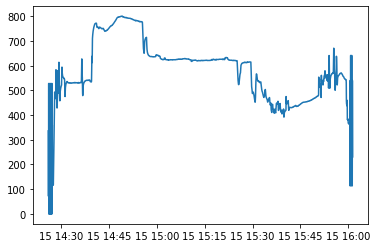

In [11]:
plt.plot(vol['t'], vol['EGT_SEL'])

Il est possible de superposer deux graphes en appelant plusieurs points plt.plot(). De plus, plot() peut recevoir une grande quantité d'options pour personnaliser l'aspect de la courbe :

- ligne ou points
- type de marqueur
- couleurs, taille/épaisseur de trait
- ...

Certaines options peuvent être combinées et exprimées sous forme de chaîne de caractère. Par exemple, 'b^--' signifie "marqueurs bleus en forme de triangles, reliés par un trait pointillé".

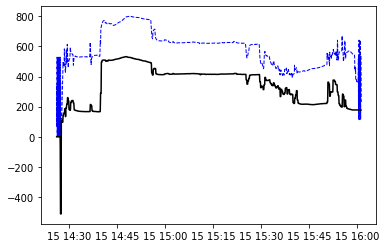

In [12]:
plt.plot(vol['t'], vol['EGT_SEL'], 'b--', linewidth=1)
plt.plot(vol['t'], vol['T3_SEL'], 'k-')

Il est possible de visualiser plusieurs graphiques de manière juxtaposée. La méthode utilisée est plt.subplot().
Ses paramètres sont : le nombre de lignes, le nombre de colonnes, et le sous-plot sur lequel vous vous trouvez. 

Ainsi, dans plt.subplot(1, 2, 1); 1, 2, 1 signifie "une figure à 1 ligne et 2 colonnes : allez au premier sous-plot". Ensuite, 1, 2, 2 signifie "une figure à 1 ligne et 2 colonnes : passez au deuxième sous-plot"

plt.figure(figsize=(x,y)) permet de définir la taille des plots, avec x : longueur et y: largeur.

plt.xlim(inf,sup) et plt.ylim(inf,sup) permettent de fixer la borne inférieur et supérieur respectivement de l'axe x et l'axe y.

(-600.0, 850.0)

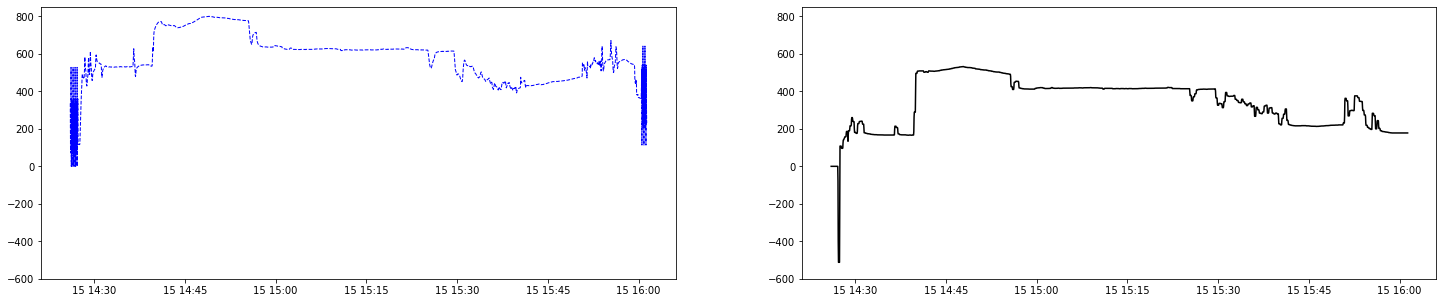

In [13]:
fig = plt.figure(figsize=(25,5))

plt.subplot(1, 2, 1)
plt.plot(vol['t'], vol['EGT_SEL'], 'b--', linewidth=1)
plt.ylim(-600,850)

plt.subplot(1, 2, 2)
plt.plot(vol['t'], vol['T3_SEL'], 'k-')
plt.ylim(-600,850)
         

Text(0, 0.5, 'Temperature (°C)')

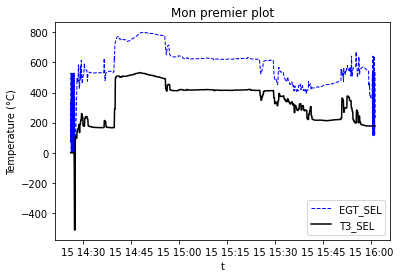

In [14]:
"""
EXERCICE - Plot avec titres et légende

Explorez la documentation de pyplot pour ajouter au graphe précédent :
1. Un titre à la figure
2. Des titres aux axes
3. Une légende
"""

plt.plot(vol['t'], vol['EGT_SEL'], 'b--', linewidth=1, label='EGT_SEL')
plt.plot(vol['t'], vol['T3_SEL'], 'k-', label='T3_SEL')
plt.title('Mon premier plot')
plt.legend()
plt.xlabel('t')
plt.ylabel('Temperature (°C)')

### Corrélation

Utiliser la méthode corrcoef du module numpy pour calculer la corrélation entre deux variables X et Y.

In [15]:
my_rho = np.corrcoef(vol['T3_SEL'], vol['N1_SEL'])

print(my_rho)

[[1.         0.93912182]
 [0.93912182 1.        ]]


Nuage de point entre les deux variables T3 et N1 :

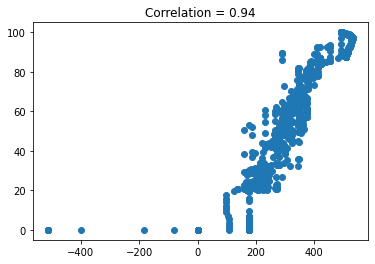

In [16]:
plt.scatter(vol['T3_SEL'],vol['N1_SEL'])
plt.title('Correlation = ' + "{:.2f}".format(my_rho[0,1]))
plt.show()

<AxesSubplot:>

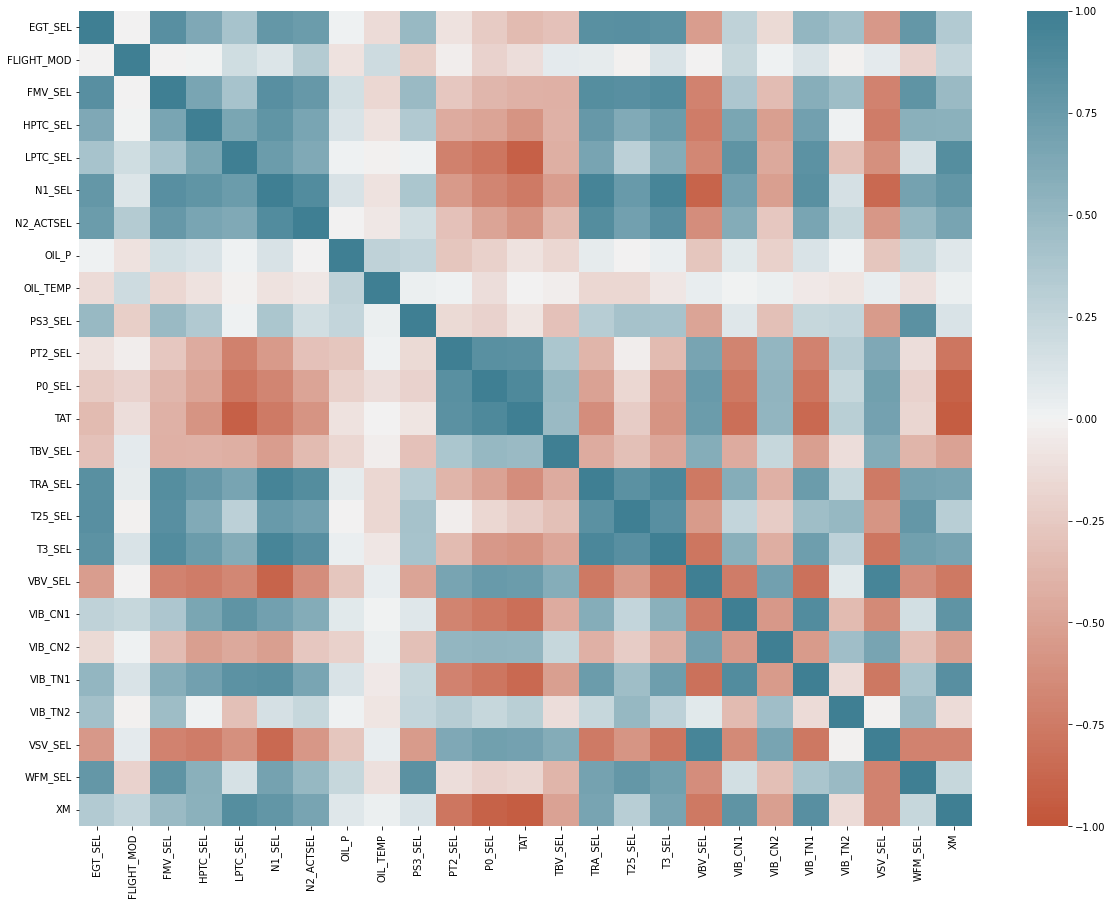

In [17]:
import seaborn as sns

# calculate the correlation matrix
corr = vol.corr()

# plot the heatmap
fig = plt.figure(figsize=(20,15))

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=False, fmt='.2f', vmin=-1, vmax=1, center=0, 
        cmap=sns.diverging_palette(20, 220, n=200))

# Essayer avec annot=True

### Bar plot : temps passé dans chaque phase de vol avec `plt.bar`

Pour afficher un ensemble réduit de valeurs, le diagramme le plus adapté est le bar plot. Tout d'abord, il nous faut calculer le nombre de lignes du vol par phase de vol. La phase de vol est symbolisée par la variable `FLIGHT_MOD`. On suppose la correspondance suivante :

`FLIGHT_MOD` | Phase de vol
-------------|-------------
1 | taxi
2 | take_off
3 | begin_climb
4 | climb
5 | cruise_climb
6 | cruise
7 | descent
8 | approach
9 | flare
10 | landing

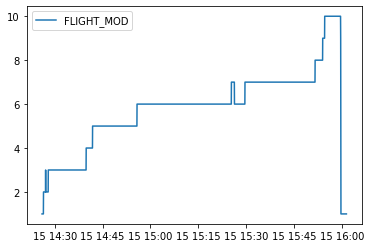

In [18]:
plt.plot(vol['t'], vol['FLIGHT_MOD'], label='FLIGHT_MOD')
plt.legend()

In [19]:
"""
EXERCICE - Correpondance FLIGHT_MOD/phase de vol
1. Créez un liste définissant la correspondance FLIGHT_MOD/phase de vol
2. Ajoutez une nouvelle colonne 'FLIGHT_PHASE' au DataFrame contenant le nom de la phase. Une possibilité est d'utiliser la méthode "apply" et une fonction anonyme (lambda).
"""

phases = ['taxi', 'take_off', 'begin_climb', 'climb', 'cruise_climb', 'cruise', 'descent', 'approach', 'flare', 'landing']
vol['FLIGHT_PHASE'] = vol['FLIGHT_MOD'].apply(lambda m: phases[m-1])


In [20]:
vol

,t,EGT_SEL,FLIGHT_MOD,FMV_SEL,HPTC_SEL,LPTC_SEL,N1_SEL,N2_ACTSEL,OIL_P,OIL_TEMP,...,T3_SEL,VBV_SEL,VIB_CN1,VIB_CN2,VIB_TN1,VIB_TN2,VSV_SEL,WFM_SEL,XM,FLIGHT_PHASE
0,2011-09-15 14:26:02.875,335.984000,1,0.000,0.0,0.0,0.0,0.0,0.000,177.3740,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7679.84,0.15,taxi
1,2011-09-15 14:26:05.375,72.000600,1,0.000,0.0,0.0,0.0,0.0,0.000,68.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.15,taxi
2,2011-09-15 14:26:07.875,72.001100,1,0.000,0.0,0.0,0.0,0.0,0.000,68.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.15,taxi
3,2011-09-15 14:26:10.375,527.978000,1,0.000,0.0,0.0,0.0,0.0,0.000,68.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10752.10,0.15,taxi
4,2011-09-15 14:26:12.875,-0.001335,1,0.000,0.0,0.0,0.0,0.0,456.002,44.6249,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.15,taxi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,2011-09-15 16:01:09.875,518.795000,1,-12.375,0.0,0.0,0.0,0.0,0.000,69.0000,...,178.0,0.0,0.0,0.0,0.0,0.0,0.0,4608.02,0.15,taxi
2279,2011-09-15 16:01:12.375,113.467000,1,-12.375,0.0,0.0,0.0,0.0,0.000,53.9055,...,178.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.15,taxi
2280,2011-09-15 16:01:14.875,540.191000,1,-12.375,0.0,0.0,0.0,0.0,0.000,10.7820,...,178.0,0.0,0.0,0.0,0.0,0.0,0.0,7679.84,0.15,taxi
2281,2011-09-15 16:01:17.375,321.570000,1,-12.375,0.0,0.0,0.0,0.0,0.000,32.3438,...,178.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.15,taxi


In [21]:
"""
EXERCICE - Calcul du nombre de lignes par phase de vol
Groupez le DataFrame par phase de vol avec groupby() et aggrégez le résultat avec size().
"""

time_by_phase = vol.groupby('FLIGHT_PHASE').size()
print(time_by_phase)

FLIGHT_PHASE
approach         57
begin_climb     281
climb            48
cruise          788
cruise_climb    335
descent         550
flare            16
landing         120
take_off         35
taxi             53
dtype: int64


Voici enfin notre fameux bar plot :

<BarContainer object of 10 artists>

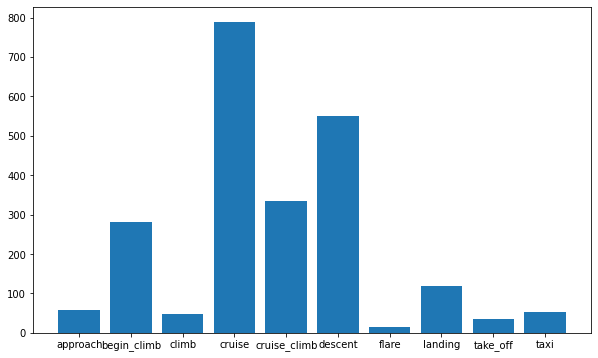

In [22]:
plt.figure(figsize=(10,6)) # la méthode figure permet de créer une nouvelle figure et de configurer ses paramètres
plt.bar(np.arange(time_by_phase.size), time_by_phase, tick_label=time_by_phase.index.tolist())

<BarContainer object of 10 artists>

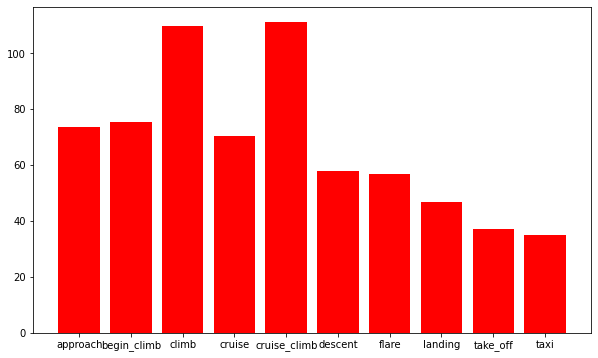

In [23]:
"""
EXERCICE - Affichez la température T25 maximale par phase de vol sur un bar plot de couleur rouge.
"""

m_egt = vol.groupby('FLIGHT_PHASE')['T25_SEL'].max()
plt.figure(figsize=(10,6))
plt.bar(np.arange(m_egt.size), m_egt, tick_label=m_egt.index.tolist(), color='r')

In [24]:
vol.groupby('FLIGHT_PHASE').max()

,t,EGT_SEL,FLIGHT_MOD,FMV_SEL,HPTC_SEL,LPTC_SEL,N1_SEL,N2_ACTSEL,OIL_P,OIL_TEMP,...,T25_SEL,T3_SEL,VBV_SEL,VIB_CN1,VIB_CN2,VIB_TN1,VIB_TN2,VSV_SEL,WFM_SEL,XM
FLIGHT_PHASE,,,,,,,,,,,,,,,,,,,,,
approach,2011-09-15 15:53:52.375,579.281,8,32.750,99.4160,26.7551,66.4843,91.4063,43.0000,113.000,...,73.5000,376.0,3.427730e+01,0.39125,0.07000,0.21000,0.11000,26.63090,3290.0,0.259
begin_climb,2011-09-15 14:39:49.875,679.625,3,19.625,94.4630,28.4893,86.1759,97.1250,47.4375,108.000,...,75.5000,289.0,3.427730e+01,0.60000,0.32000,0.13000,0.32000,31.99220,10752.1,0.150
climb,2011-09-15 14:41:49.875,772.094,4,70.375,99.5000,25.8750,90.2500,99.3750,52.0000,108.000,...,109.5000,509.0,1.888140e-12,0.12875,0.11000,0.24125,0.34000,2.24121,7718.0,0.274
cruise,2011-09-15 15:29:32.375,714.594,6,42.000,99.4951,64.0625,93.3320,95.3750,43.0000,105.000,...,70.5000,454.0,4.834030e-01,0.34000,0.08000,0.52000,0.23000,5.00977,3478.0,0.791
cruise_climb,2011-09-15 15:59:34.875,800.000,5,64.625,99.5542,61.1387,100.0000,99.2188,51.0000,96.000,...,111.0000,532.0,3.392580e+01,0.20000,0.11125,0.40125,0.46000,38.32030,6656.0,0.749
descent,2011-09-15 15:51:29.875,579.875,7,33.875,99.4902,63.3750,82.7852,91.7188,43.0000,116.000,...,58.0000,399.5,3.427730e+01,0.41125,0.28375,0.69375,0.41875,26.87260,2794.0,0.783
flare,2011-09-15 15:59:32.375,641.031,9,32.750,94.0859,26.6182,72.8709,94.0625,43.0312,108.000,...,56.7500,298.0,3.423340e+01,0.09375,0.16375,0.15125,0.20000,38.05660,4794.0,0.180
landing,2011-09-15 15:59:29.875,670.749,10,19.375,45.3926,27.5510,43.7070,84.5000,37.0000,113.000,...,46.7500,283.0,3.399170e+01,0.08000,0.29250,0.12000,0.23000,37.02390,1804.0,0.150
take_off,2011-09-15 14:27:57.875,527.981,2,10.750,37.2070,27.3848,17.7070,60.1563,743.9960,658.626,...,37.2500,108.0,3.427730e+01,0.00000,0.24250,0.00000,0.12875,38.40820,10752.0,0.150


In [25]:
m_egt

FLIGHT_PHASE
approach         73.5000
begin_climb      75.5000
climb           109.5000
cruise           70.5000
cruise_climb    111.0000
descent          58.0000
flare            56.7500
landing          46.7500
take_off         37.2500
taxi             35.1406
Name: T25_SEL, dtype: float64

### Pie plot : temps passé dans chaque phase de vol avec `plt.pie`

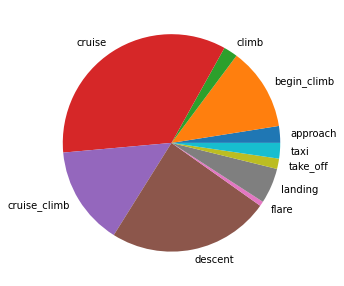

In [26]:
plt.figure(figsize=(5,5))
plt.pie(time_by_phase, labels=time_by_phase.index.tolist());

### Histogramme : représenter la distribution d'une variable

La meilleur façon de visualiser la distribution statistique d'une variable est l'histogramme. La méthode s'appelle `plt.hist()`. Étudiez sa documentation, car elle a de nombreux paramètres.

Voici un exemple avec la variable N1.

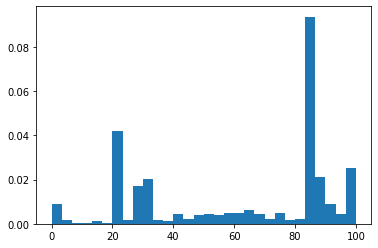

In [27]:
plt.hist(vol['N1_SEL'], bins=30, density=True); # Quel est l'effet de l'argument "density=..." ?